In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import tree, datasets
from sklearn.model_selection import train_test_split

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#path = "iris.csv"
headernames = ['petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names = headernames)
dataset.head()


,,petal-length,petal-width,Class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values
# y = dataset.target


In [20]:
dataset.Class = dataset.Class.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])

In [21]:
dataset

,,petal-length,petal-width,Class
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
...,...,...,...,...
6.7,3.0,5.2,2.3,2
6.3,2.5,5.0,1.9,2
6.5,3.0,5.2,2.0,2
6.2,3.4,5.4,2.3,2


In [22]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.9473684210526315

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2288\1318610405.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


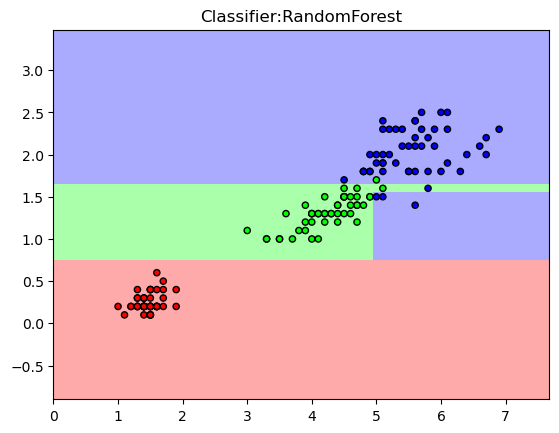

In [31]:
#定义图像中分区的颜色和散点的颜色
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")


plt.show()

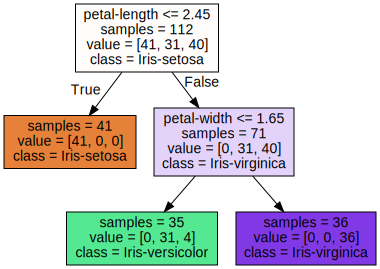

In [25]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="iris.dot", class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
feature_names=headernames[:2], impurity=False, filled=True)

with open("iris.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators=25,random_state=3)
forest1.fit(X_train, y_train)
print(forest1.score(X_test, y_test))

0.9473684210526315


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2288\1567515645.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


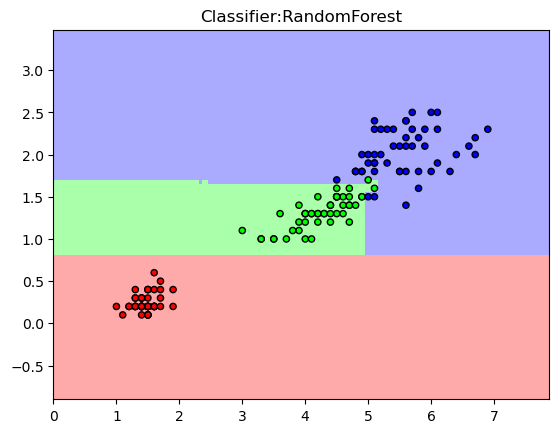

In [27]:
#定义图像中分区的颜色和散点的颜色
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = forest1.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")


plt.show()